In [5]:
from Errors import *
import os, glob
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [6]:
EXPERIMENT = "B"

MULTIPLIERS = {
    "A": 1,
    "B": 10e-3,
    "C": 1,
    "K": 1
}

EVAL_PATH = (
    r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Images\Eval"
    + f"\\Raymarching-{EXPERIMENT}"
)

plt.style.use("seaborn-v0_8-whitegrid")

plt.rcParams["font.size"] = 16  # Set the global font size
plt.rcParams["font.family"] = "serif"

def get_colors(length):
    return plt.cm.get_cmap("tab20", length)

In [7]:
def plot_error_data(x, data, keys_to_labels, error_name, figsize=(10, 8)):
    real_x = [a * MULTIPLIERS[EXPERIMENT] for a in x]

    fig, axes = plt.subplots(
        figsize=figsize, nrows=len(keys_to_labels), ncols=1, sharex=True
    )

    colors = get_colors(len(keys_to_labels))

    for i, (key, label) in enumerate(keys_to_labels.items()):
        ax = axes[i]
        y = [data[a][key] for a in x]
        ax.plot(real_x, y, marker="o", color=colors(0))
        ax.set_ylabel(label)
        # legend = ax.legend(loc="upper left", frameon=True)
        # legend.get_frame().set_edgecolor("gray")  # Set the border color
        # legend.get_frame().set_facecolor("white")  # Set the background color

    plt.xlabel("a")
    plt.tight_layout()
    plt.show()

    # save the plot
    if not os.path.exists(EXPERIMENT):
        os.makedirs(EXPERIMENT)
    fig.savefig(
        os.path.join(EXPERIMENT, f"{error_name}.png"),
        facecolor=fig.get_facecolor(),
        edgecolor=fig.get_edgecolor(),
    )

# IDE

In [8]:
ide_folders = [
    folder
    for folder in os.listdir(EVAL_PATH)
    if folder.startswith(EXPERIMENT) and os.path.isdir(os.path.join(EVAL_PATH, folder))
]

ide_folders.sort( key=lambda x: path_to_value(x) )

print(ide_folders)

['B1-IDE_20240416_235256', 'B2-IDE_20240416_235447', 'B4-IDE_20240416_235545', 'B10-IDE_20240416_235621', 'B20-IDE_20240416_235706', 'B50-IDE_20240416_235733', 'B100-IDE_20240416_235807']


In [9]:
ide_results = {}
for ide_folder in ide_folders:
    folder_path = os.path.join(EVAL_PATH, ide_folder)
    for file_name in os.listdir(folder_path):
        if file_name.startswith("IDE_1") and file_name.endswith(".png"):
            file_path = os.path.join(folder_path, file_name)
            ide_results[path_to_value(folder_path)] = IDE(file_path, True)
    

For B1-IDE_20240416_235256:
	Among 360000 pixels:
	Number of missed intersections (-1): 31
	Number of no intersections (-100): 28784
	Average IDE value: 3.9001944065093994
	Median IDE value: 0.0810546875
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 40053.03125


For B2-IDE_20240416_235447:
	Among 360000 pixels:
	Number of missed intersections (-1): 62
	Number of no intersections (-100): 28784
	Average IDE value: 8.556519508361816
	Median IDE value: 0.1083984375
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 44169.6484375
For B4-IDE_20240416_235545:
	Among 360000 pixels:
	Number of missed intersections (-1): 140
	Number of no intersections (-100): 28784
	Average IDE value: 19.206228256225586
	Median IDE value: 0.1629638671875
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60661.10546875
For B10-IDE_20240416_235621:
	Among 360000 pixels:
	Number of missed intersections (-1): 370
	Number of no intersections (-100): 28784
	Average IDE value: 52.39095687866211
	Median IDE value: 0.342529296875
	Lowest IDE value: 6.103515625e-05
	Highest IDE value: 60156.703125
For B20-IDE_20240416_235706:
	Among 360000 pixels:
	Number of missed intersections (-1): 664
	Number of no intersections (-100): 28784
	Average IDE value: 108.62625122070312
	

In [10]:
print(ide_results)

{1.0: {'num_missed_intersection': 31, 'num_no_intersection': 28784, 'average_IDE': 3.9001944, 'highest_value': 40053.03, 'lowest_value': 6.1035156e-05, 'median_value': 0.08105469}, 2.0: {'num_missed_intersection': 62, 'num_no_intersection': 28784, 'average_IDE': 8.5565195, 'highest_value': 44169.65, 'lowest_value': 6.1035156e-05, 'median_value': 0.10839844}, 4.0: {'num_missed_intersection': 140, 'num_no_intersection': 28784, 'average_IDE': 19.206228, 'highest_value': 60661.105, 'lowest_value': 6.1035156e-05, 'median_value': 0.16296387}, 10.0: {'num_missed_intersection': 370, 'num_no_intersection': 28784, 'average_IDE': 52.390957, 'highest_value': 60156.703, 'lowest_value': 6.1035156e-05, 'median_value': 0.3425293}, 20.0: {'num_missed_intersection': 664, 'num_no_intersection': 28784, 'average_IDE': 108.62625, 'highest_value': 59744.67, 'lowest_value': 6.1035156e-05, 'median_value': 0.6904297}, 50.0: {'num_missed_intersection': 1302, 'num_no_intersection': 28784, 'average_IDE': 254.7551,

[1.0, 2.0, 4.0, 10.0, 20.0, 50.0, 100.0]


C:\Users\user\AppData\Local\Temp\ipykernel_29864\1549348801.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


KeyError: 0.01

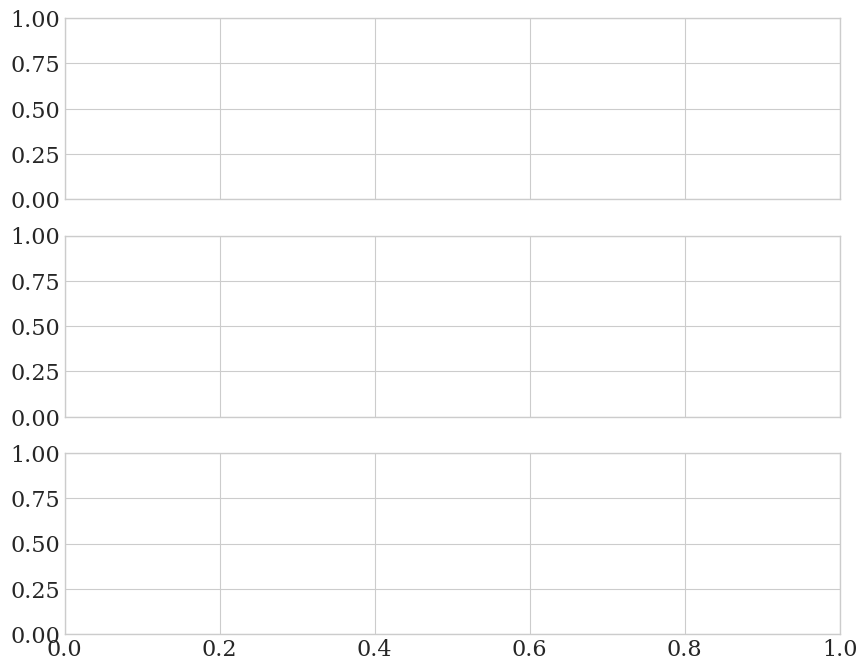

In [11]:
# Extract the keys and values from ide_results dictionary
x = list(ide_results.keys())
x = [float(a) for a in x]
x.sort()
print(x)


keys_to_labels = {
    "average_IDE": "Average IDE",
    "median_value": "Median IDE",
    "num_missed_intersection": "Missed Intersections",
}


plot_error_data(x, ide_results, keys_to_labels, "IDE")

# HDE

In [ ]:
hde_paths = glob.glob(os.path.join(EVAL_PATH, f'{EXPERIMENT}*.png'))

hde_paths.sort( key=lambda x: path_to_value(x) )
print(hde_paths)

['C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A0.1-HDE_20240416_221122.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A1-HDE_20240416_221301.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A5-HDE_20240416_221340.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A10-HDE_20240416_221450.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A20-HDE_20240416_232531.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A50-HDE_20240416_232620.png', 'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Im

In [ ]:
hde_results = {}
for hde_path in hde_paths:
    hde_results[path_to_value(hde_path)] = HDE(hde_path, True)

For A0.1-HDE_20240416_221122.png:
	Among 360000 pixels:
	Number of no intersections: 28913
	Average HDE value: 0.7999324798583984
	Lowest HDE value: 2.648448571562767e-09
	Highest HDE value: 182.1120147705078
For A1-HDE_20240416_221301.png:
	Among 360000 pixels:
	Number of no intersections: 28927
	Average HDE value: 0.8175764679908752
	Lowest HDE value: 1.2386590242385864e-07
	Highest HDE value: 183.05104064941406
For A5-HDE_20240416_221340.png:
	Among 360000 pixels:
	Number of no intersections: 28922
	Average HDE value: 0.9292274713516235
	Lowest HDE value: 1.9717845134437084e-07
	Highest HDE value: 205.8627166748047
For A10-HDE_20240416_221450.png:
	Among 360000 pixels:
	Number of no intersections: 28921
	Average HDE value: 1.08683443069458
	Lowest HDE value: 5.308538675308228e-07
	Highest HDE value: 187.35000610351562
For A20-HDE_20240416_232531.png:
	Among 360000 pixels:
	Number of no intersections: 28938
	Average HDE value: 1.4274516105651855
	Lowest HDE value: 7.927883416414261e-

C:\Users\user\AppData\Local\Temp\ipykernel_31708\3601929294.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


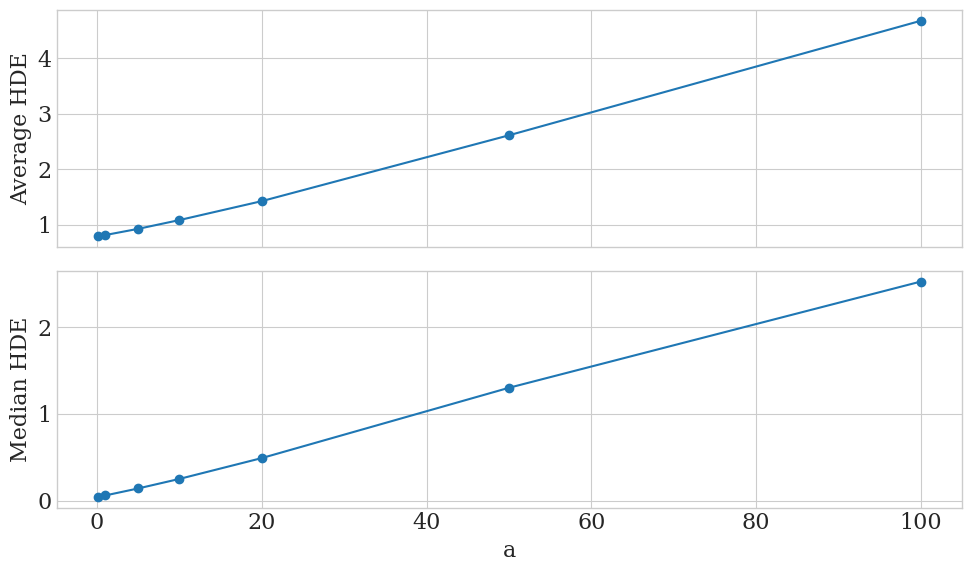

In [ ]:
x = [float(a) for a in hde_results.keys()]

keys_to_labels = {
    "average_HDE": "Average HDE",
    "median_value": "Median HDE",
}

plot_error_data(x, hde_results, keys_to_labels, "HDE", figsize=(10, 6))

# Performance

In [ ]:
csv_path = EVAL_PATH + f"\\{EXPERIMENT}-perf.csv"
csv_path

'C:\\Users\\user\\Documents\\George\\CPP_Projects\\Procedural_Implicit_Terrain_Raymarching\\Images\\Eval\\Raymarching-A\\A-perf.csv'

In [ ]:
df: DataFrame = pd.read_csv(csv_path)

print(df)

       A  Frame Time
0    0.1   34.863598
1    1.0   31.567360
2    5.0   28.222269
3   10.0   24.602036
4   20.0   18.303118
5   50.0   16.265162
6  100.0   12.113853


C:\Users\user\AppData\Local\Temp\ipykernel_31708\3601929294.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap("tab20", length)


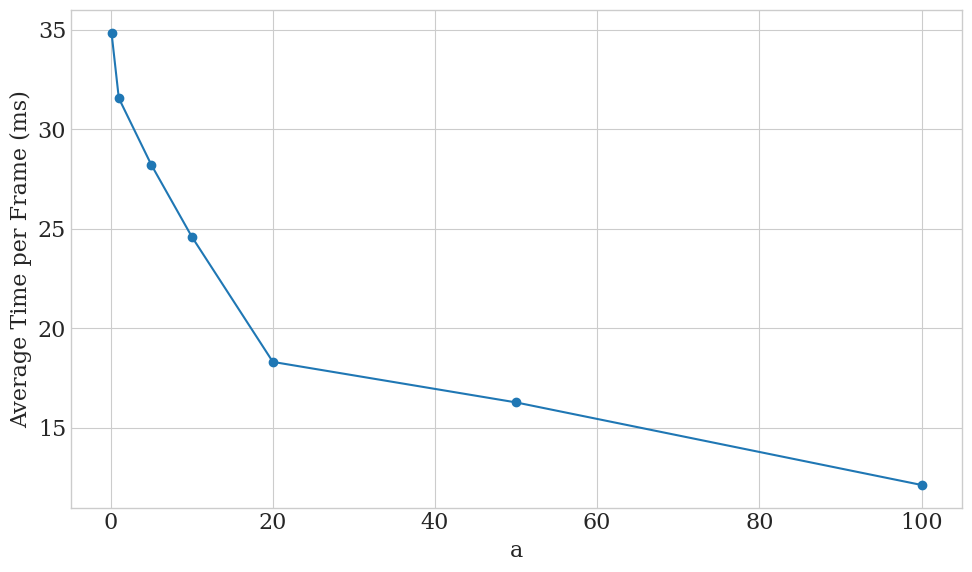

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = get_colors(1)
ax.plot(df.iloc[:, 0], df.iloc[:, 1], label="FPS", marker="o", color=colors(0))
plt.xlabel("a")
plt.ylabel("Average Time per Frame (ms)")
plt.tight_layout()

fig.savefig(
    os.path.join(EXPERIMENT, f"Performance.png"),
    facecolor=fig.get_facecolor(),
    edgecolor=fig.get_edgecolor(),
)